In [88]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [89]:
os.environ["GROQ_API_KEY"]= os.getenv("GROQ_API_KEY")
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")

In [90]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter

In [91]:
urls = [
    "https://github.com/mewawalaabdeali/LangGraph_Detailed.git",
    
    "https://github.com/mewawalaabdeali/Langgraph_methodologies.git"
]

docs = [WebBaseLoader(url).load() for url in urls]
docs

[[Document(metadata={'source': 'https://github.com/mewawalaabdeali/LangGraph_Detailed.git', 'title': 'GitHub - mewawalaabdeali/LangGraph_Detailed', 'description': 'Contribute to mewawalaabdeali/LangGraph_Detailed development by creating an account on GitHub.', 'language': 'en'}, page_content='\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nGitHub - mewawalaabdeali/LangGraph_Detailed\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSkip to content\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nNavigation Menu\n\nToggle navigation\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n            Sign in\n          \n\n\n \n\n\nAppearance settings\n\n\n\n\n\n\n\n\n\n\n\n        Product\n        \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            GitHub Copilot\n          \n        Write better code with AI\n      \n\n\n\n\n\n\n\n\n            GitHub Models\n              \n     

In [92]:
doc_list=[doc for sublist in docs for doc in sublist]

textSplitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=100)
docsplit = textSplitter.split_documents(doc_list)

print(doc_list[:2])

vectorstore = FAISS.from_documents(
    documents=docsplit,
    embedding=OpenAIEmbeddings()
)

retriever= vectorstore.as_retriever()

[Document(metadata={'source': 'https://github.com/mewawalaabdeali/LangGraph_Detailed.git', 'title': 'GitHub - mewawalaabdeali/LangGraph_Detailed', 'description': 'Contribute to mewawalaabdeali/LangGraph_Detailed development by creating an account on GitHub.', 'language': 'en'}, page_content='\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nGitHub - mewawalaabdeali/LangGraph_Detailed\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSkip to content\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nNavigation Menu\n\nToggle navigation\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n            Sign in\n          \n\n\n \n\n\nAppearance settings\n\n\n\n\n\n\n\n\n\n\n\n        Product\n        \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            GitHub Copilot\n          \n        Write better code with AI\n      \n\n\n\n\n\n\n\n\n            GitHub Models\n              \n      

In [93]:
retriever.invoke("What is langGraph")

[Document(id='65791aea-c36e-4063-bc35-5d1696f4514c', metadata={'source': 'https://github.com/mewawalaabdeali/LangGraph_Detailed.git', 'title': 'GitHub - mewawalaabdeali/LangGraph_Detailed', 'description': 'Contribute to mewawalaabdeali/LangGraph_Detailed development by creating an account on GitHub.', 'language': 'en'}, page_content='GitHub - mewawalaabdeali/LangGraph_Detailed\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSkip to content\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nNavigation Menu\n\nToggle navigation\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n            Sign in\n          \n\n\n \n\n\nAppearance settings\n\n\n\n\n\n\n\n\n\n\n\n        Product\n        \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            GitHub Copilot\n          \n        Write better code with AI\n      \n\n\n\n\n\n\n\n\n            GitHub Models\n              \n                New\n              \n\n        Manage and compare prompts\n      \n\n\n\n\n\n\n\n\n            GitHub

In [94]:
###Retriever to Retriever tool

from langchain.tools.retriever import create_retriever_tool
retriever_tool = create_retriever_tool(
    retriever,
    "retriever_vector_db_blog",
    "Search and run information about langchain"
)

In [95]:
retriever_tool

Tool(name='retriever_vector_db_blog', description='Search and run information about langchain', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x00000201D2BA7B00>, retriever=VectorStoreRetriever(tags=['FAISS', 'OpenAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x00000202529AD5E0>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n', response_format='content'), coroutine=functools.partial(<function _aget_relevant_documents at 0x00000201D2BA7E20>, retriever=VectorStoreRetriever(tags=['FAISS', 'OpenAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x00000202529AD5E0>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), 

In [96]:
###Langchain vector db
langchain_urls = [
    "https://github.com/mewawalaabdeali/Langchain_methodologies.git",
    "https://github.com/mewawalaabdeali/Youtube_Chat.git"
    ]

docs = [WebBaseLoader(url).load() for url in langchain_urls]
docs


[[Document(metadata={'source': 'https://github.com/mewawalaabdeali/Langchain_methodologies.git', 'title': 'GitHub - mewawalaabdeali/Langchain_methodologies', 'description': 'Contribute to mewawalaabdeali/Langchain_methodologies development by creating an account on GitHub.', 'language': 'en'}, page_content='\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nGitHub - mewawalaabdeali/Langchain_methodologies\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSkip to content\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nNavigation Menu\n\nToggle navigation\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n            Sign in\n          \n\n\n \n\n\nAppearance settings\n\n\n\n\n\n\n\n\n\n\n\n        Product\n        \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            GitHub Copilot\n          \n        Write better code with AI\n      \n\n\n\n\n\n\n\n\n            GitHub Models\n 

In [97]:
doc_list = [item for sublist in docs for item in sublist]

text_Splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap=100
)

docs_splits = text_Splitter.split_documents(doc_list)

vectorStoreLangchain = FAISS.from_documents(
    documents=docs_splits,
    embedding=OpenAIEmbeddings()
)

retrieverlangChain = vectorStoreLangchain.as_retriever()

In [98]:
from langchain.tools.retriever import create_retriever_tool

retriever_tool_langchain = create_retriever_tool(
    retrieverlangChain,
    "retriever_vector_langchain_blog",
    "Search and run Information about Langchain"
)

In [99]:
tools = [retriever_tool, retriever_tool_langchain]

### LangGraph Workflow

In [100]:
from typing import Annotated, Sequence
from typing_extensions import TypedDict
from langchain_core.messages import BaseMessage
from langgraph.graph.message import add_messages

class AgentState(TypedDict):
    #The add_message function defines how an update should be processed
    #Default is to replace. add_messages says "append"
    messages: Annotated[Sequence[BaseMessage], add_messages]

In [101]:
from langchain_groq import ChatGroq
groq = ChatGroq(model = "gemma2-9b-it")
groq.invoke("tell me about langchain")

AIMessage(content="LangChain is a powerful and flexible framework designed to simplify the development of applications powered by large language models (LLMs). Think of it as a toolbox filled with components that help you build sophisticated AI applications, going beyond simple text generation.\n\n**Here's a breakdown of what LangChain offers:**\n\n* **Modular Components:**  LangChain provides a collection of reusable modules that handle different aspects of LLM interaction, such as:\n    * **Prompts:**  Crafting effective prompts to guide the LLM's output.\n    * **Memory:**  Enabling LLMs to remember past interactions in a conversation.\n    * **Chains:**  Sequencing multiple LLMs or other tools together to perform complex tasks.\n    * **Agents:**  Creating autonomous AI agents that can interact with the world and make decisions.\n* **Integration with LLMs:** LangChain supports a wide range of LLMs, including popular models like OpenAI's GPT models, HuggingFace's Transformers, and m

In [ ]:
from langchain_openai import ChatOpenAI
def agent(state):
    """
    Invokes the agent model to generate a response based on the current state. Given
    the question, it will decide to retrieve using the retriever tool, or simply end.
    
    Args:
        state(messages): The current state
        
    Returns:
        dict: The updated state with the agent response appended to the messages
    """
    print("---CALL AGENT---")
    messages = state["messages"]
    model = ChatOpenAI(model = 'gpt-4o')
    model = model.bind_tools(tools)
    response = model.invoke(messages)
    #We return a list, because this will get added to the existing list
    return {"messages": [response]}

In [103]:
from langchain import hub
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_openai import ChatOpenAI
from pydantic import BaseModel, Field
from typing import Literal, Annotated, Sequence
from typing_extensions import TypedDict

In [104]:
def grade_documents(state) -> Literal["generate","rewrite"]:
    """ 
    Determine whether the retrieved documents are relevant to the question
    
    Args:
        state(messages):The current state
        
    Returns:
        str: A decision for whether the documents are relevant or not
    """
    print("---CHECK RELEVANCE---")

    class grade(BaseModel):
        """Binary score for relevance check."""
        binary_score:str=Field(description="Relevance score 'yes' or 'no' ")

    groq_withtool = groq.with_structured_output(grade)
    prompt = PromptTemplate(
        template="""You are a grader assessing relevance of a retrieved document to a user question. \n
        Here is the retrieved document: \n\n {context} \n\n
        Here is the user question: {question} \n
        If the document contains keyword(s) or semantic meaning related to the user question, grade it as relevant. \n
        Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question""",
        input_variables=["context", "question"]
    )

    chain = prompt | groq_withtool

    messages = state["messages"]
    last_message = messages[-1]

    question = messages[0].content

    scored_result = chain.invoke({"question":question, "context":docs})

    score = scored_result.binary_score

    if score == "yes":
        print("---DECISION: DOCS RELEVANT ---")
        return "generate"
    else:
        print("---DECISION: DOCS NOT RELEVANT ---")
        print(score)
        return "rewrite"

In [105]:
def generate(state):
    """ Generate answer
    
    Args:
        state(messages): The current state
        
    Returns:
        dict: The updated message
    """
    print("---GENERATE---")
    messages = state["messages"]
    question = messages[0].content
    last_message = messages[-1]
    docs = last_message.content

    #Prompt 
    prompt = hub.pull("rlm/rag-prompt")
    
    def format_docs(docs):
        return "\n\n".join(doc.page_content for doc in docs)
    rag_chain = prompt | groq | StrOutputParser()

    response = rag_chain.invoke({"context":docs, "question":question})
    return {"messages":[response]}


In [ ]:
def rewrite(state):
    """ 
    Transform the query to produce a better  question
    
    Args:
        state(messages): The current state
        
    Returns:
        dict: The updated state  with re-phrased question
    """
    print("---TRANSFORM QUERY---")
    messages = state["messages"]
    question = messages[0].content

    msg = [
        HumanMessage(
            content=f"""\n
    Look at the input and try to reason about the underlying semantic intent /meaning. \n 
    Here is the initial question:
    \n ------- \n 
    {question}
    \n ------- \n 
    Formulate an improved questin:"""
        )
    ]

    model = ChatOpenAI(model = "gpt-4o")

    response = model.invoke(msg)
    return {"messages": [response]}

In [107]:
from langgraph.graph import START, StateGraph, END
from langgraph.prebuilt import ToolNode, tools_condition

graph = StateGraph(AgentState)

graph.add_node("agent", agent)
retrieve = ToolNode([retriever_tool, retriever_tool_langchain])
graph.add_node("retrieve", retrieve)
graph.add_node("rewrite", rewrite)
graph.add_node(
    "generate", generate
)#Generating a response after we know the documents are relevant
#Call agent node to decide to retrieve or not


graph.add_edge(START, "agent")
graph.add_conditional_edges(
    "agent",
    tools_condition,
    {
        #Translate the condition outputs to nodes in our graph
        "tools":"retrieve",
        END:END,
    },
)

graph.add_conditional_edges(
    "retrieve",
    #Assess agent decision
    grade_documents,
)

graph.add_edge("generate", END)
graph.add_edge("rewrite", "agent")

#Compile
workflow = graph.compile()

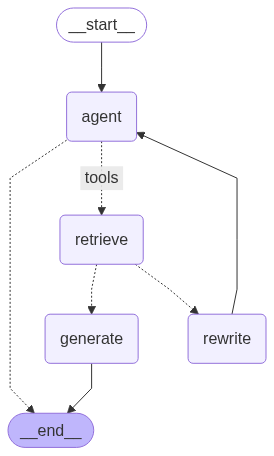

In [108]:
workflow

In [109]:
workflow.invoke({"messages":[HumanMessage(content="What is Langgraph")]})

---CALL AGENT---
---CHECK RELEVANCE---


BadRequestError: Error code: 400 - {'error': {'message': 'Please reduce the length of the messages or completion.', 'type': 'invalid_request_error', 'param': 'messages', 'code': 'context_length_exceeded'}}